#  <font color='blue'>Project 4: Wrangle and Analyze Data</font>

# Instructions: 
Real world data normally comes with poor quality, different format and require a cleaning before start to analysis and visualizations.
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The Twitter dog archive contains basic tweet data (tweet ID, timestamp, text, etc.) 

Mainly goal of this project is create a interesting and trustworthy analysis and visualizations.

### our tasks in this project are as follows:

*Data wrangling, which consists of:
+ Gathering data 
+ Assessing data
+ Cleaning data
+ Storing, analyzing, and visualizing your wrangled data
+ Reporting on:
    + data wrangling efforts
    
    + data analyses and visualizations
    
### Files:
+ twitter_archive_enhanced.csv
+ The tweet image predictions: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
+ Getting information through Twitter API.


In [1]:
#Important libraries must be import.
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import time

# GATHER 

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### **2nd step:** 
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is in image_predictions.tsv is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

According with the second step I have to downloand a file using request library.

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
#I going to open the file called:image_predictions.tsv
images=pd.read_csv('image_predictions.tsv', sep='\t')
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 3 rd step:
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.



#### First, I am going to create an API object that I can use to gather Twitter data.
I read information on  https://docs.tweepy.org/en/v3.5.0/api.html to understand this process.

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True,wait_on_rate_limit_notify = True)


### Writing and Reading Twitter JSON


I am going to create two lists. The first one call **yes_lits_tweets** will save the tweets found in  the column **tweet_id** and the second one **no_find_tweets**  will have tweets that it does not find in our dataset called **df**. 

In [6]:
tweet_ids=df.tweet_id.values
len(tweet_ids)

2356

In [7]:

yes_list_tweets = []
no_find_tweets=[]

for tweet_id in tweet_ids:
    try:
        yes_list_tweets.append(api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True))
       
        
            
    except tweepy.TweepError as e:
        no_find_tweets.append(tweet_id)
        pass

Rate limit reached. Sleeping for: 708
Rate limit reached. Sleeping for: 718


I am going to verify if my tweet were saved on the list properly.

In [8]:
print(yes_list_tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

I will check the lenght of yes_list_tweets and no_find_tweets.


In [9]:
print("The lengh of the result", len(yes_list_tweets))
print("The lengh of the errors", len(no_find_tweets))

The lengh of the result 2331
The lengh of the errors 25


According with https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ provided on UDACITY platform the data will store each tweet's entire set of JSON data in a file called tweet_json.txt file.




In [10]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(yes_list_tweets, indent=4))

Secondly, Selected the important information mentioned in the udacity instructions Such as: tweet ID, retweet count, and favorite count and other information I believe it could be import. Additionally,whole information will save in a dataframe called **tweet_json**
Additionally, I used the command **.find** to obtai just device source to the column called **source**.
I read this website https://www.w3schools.com/python/ref_string_find.asp as a complement to my code.

In [11]:
important_tweets=[]
with open('tweet_json.txt', encoding='utf-8') as json_file:
    data = json.load(json_file)
    for tweets in data:
        tweet_id = tweets['id']
        retweets = tweets['retweet_count']
        favorites = tweets['favorite_count']
        followers = tweets['user']['followers_count']
        friends = tweets['user']['friends_count']  
        split_source = tweets['source']
        select_device = split_source[split_source.find('rel="nofollow">') + 15:-4]
        source_device=select_device

        important_tweets.append({'tweet_id': int(tweet_id), 'retweets': int(retweets),'favorites': int(favorites),
                        'followers': int(followers), 'friends': int(friends),'source_device':str(source_device)})


I will create a DataFrame with all data.

In [12]:
file_tweets = pd.DataFrame(important_tweets, columns = ['tweet_id','retweets','favorites', 'followers',
                                               'friends','source_device'])
file_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)


In [13]:
twitter_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
twitter_data.head()

,tweet_id,retweets,favorites,followers,friends,source_device
0,892420643555336193,7335,34960,8989897,16,Twitter for iPhone
1,892177421306343426,5473,30267,8989897,16,Twitter for iPhone
2,891815181378084864,3621,22778,8989897,16,Twitter for iPhone
3,891689557279858688,7525,38232,8989897,16,Twitter for iPhone
4,891327558926688256,8096,36498,8989897,16,Twitter for iPhone


## <font color='orange'>*Brief Summary*</font>

During whole process I have to import important libraries such as : tweepy, json and pandas. In addition, I created a develop account on twitter where I got twitter api keys. Additionally, I search information to understand the commands and what is means in https://docs.tweepy.org/en/v3.5.0/api.html
Secondly, I stored  data inside a list called yes_list_tweets. Next, data were saved in a file called tweet_json.txt  with each tweet's JSON data on its own line. 
Third, I extrated important information according udemy instructions. Finally, those data were save into **twitter_data**.


# ASSESSING DATA

All files I will open and I will extract information such as: info, describe, duplicate values and others. 

## df
Our first file is called **df** where I saved **twitter-archive-enhanced.csv**

In [14]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


I am going to use **value_counts()** which return a series containing counts of unique values.

In [18]:
df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
               ... 
Olaf              1
Eugene            1
Rolf              1
Covach            1
Cleopatricia      1
Name: name, Length: 957, dtype: int64

In [19]:
df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

I am goint to use **Series.duplicated(keep='first')**  on tweet_id column which indicate duplicate Series values.

In [20]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**I do not have duplicated values.**

let's compare the columns **rating_numerator** and **rating_denominator** 

In [21]:
df[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


##  <font color='orange'> Quality </font>

As we can observe some data should be with different Dtype. 

1.those columns must be object (string) instead of float. 
+ in_reply_to_status_id      
+ in_reply_to_user_id
+ retweeted_status_id         
+ retweeted_status_user_id 

2.On the other hand these must be datetime rather than object.
+ timestamp 
+ retweeted_status_timestamp

3.Beside, There is missing values as we confirmed on info().

4.Column name has invalid names for intances: there are just vowels and  NONE.

5.Columns rating_numerator and rating_denominator has different
values.

6.In source column has to many information which need to be clear.



## Images 
Now, I will open the file images where I saved the file called **image_predictions.tsv**

In [22]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
images.jpg_url.value_counts()

https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg    2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg    2
                                                  ..
https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg    1
https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg    1
https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg    1
https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg    1
https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [26]:
images.jpg_url.nunique()

2009

In [27]:
images[images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There is not dumplicated values.

In [28]:
images.tweet_id.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

## twitter_data

In [29]:
twitter_data.head()

,tweet_id,retweets,favorites,followers,friends,source_device
0,892420643555336193,7335,34960,8989897,16,Twitter for iPhone
1,892177421306343426,5473,30267,8989897,16,Twitter for iPhone
2,891815181378084864,3621,22778,8989897,16,Twitter for iPhone
3,891689557279858688,7525,38232,8989897,16,Twitter for iPhone
4,891327558926688256,8096,36498,8989897,16,Twitter for iPhone


In [30]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2331 non-null   int64 
 1   retweets       2331 non-null   int64 
 2   favorites      2331 non-null   int64 
 3   followers      2331 non-null   int64 
 4   friends        2331 non-null   int64 
 5   source_device  2331 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [31]:
twitter_data.describe()

,tweet_id,retweets,favorites,followers,friends
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7.419079e+17,2582.661948,7298.210639,8.989917e+06,16.0
std,6.823170e+16,4368.623310,11337.770503,3.847111e+01,0.0
min,6.660209e+17,1.000000,0.000000,8.989897e+06,16.0
25%,6.782670e+17,524.000000,1262.000000,8.989898e+06,16.0
50%,7.182469e+17,1205.000000,3163.000000,8.989920e+06,16.0
75%,7.986692e+17,2988.500000,8925.500000,8.989922e+06,16.0
max,8.924206e+17,74122.000000,150216.000000,8.990315e+06,16.0


In [32]:
twitter_data[twitter_data.retweets.duplicated()]

,tweet_id,retweets,favorites,followers,friends,source_device
74,878281511006478336,1115,7021,8989897,16,Twitter for iPhone
75,878057613040115712,5963,38307,8989897,16,Twitter for iPhone
96,873213775632977920,1390,6544,8989897,16,Twitter for iPhone
99,872620804844003328,3210,18965,8989897,16,Twitter for iPhone
108,870804317367881728,5473,30786,8990282,16,Twitter for iPhone
...,...,...,...,...,...,...
2326,666049248165822465,38,93,8989930,16,Twitter for iPhone
2327,666044226329800704,122,259,8989930,16,Twitter for iPhone
2328,666033412701032449,39,106,8989930,16,Twitter for iPhone
2329,666029285002620928,41,117,8989930,16,Twitter for iPhone


In [33]:
twitter_data.friends.value_counts()

16    2331
Name: friends, dtype: int64

In [34]:
twitter_data.friends.isnull().sum()

0

##  <font color='orange'> Tidiness </font>

As we can observe whole data (tables) there are tidiness in our data:

  1.Table called **df** has four columns which indicated the different types of dogs.Then, this could be in one column and it will be easier to plot its. 
+ doggo	
+ floofer
+ pupper	
+ puppo



2. Also we can make a group of called **confident**, this will have p1_conf, p2_conf and p3_conf. as udacity description: p1_conf is how confident the algorithm is in its #1 prediction and so on.



# CLEANING DATA

In this section I will fix the quality and tidness of wole data. 

 ### COPY ALL DATASET 

I will make a copy of **df** with a new name as **df_copy**. 
Secondly, I will cocante **df_copy** with images and twitter_data files just because it will easier to work with. 


In [35]:
df_copy=df.copy()
images_copy=images.copy()
twitter_copy=twitter_data.copy()

### Define 

 I have 3 file copy and I searched informartion how to concate those file in one line code. We know that the three file has the same tweet_id, so that should be the same in our final table called **all_data**.
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

### Code 

In [36]:
all_data= pd.concat([df_copy, images_copy, twitter_copy], join='outer', axis=1)

### Test

In [37]:
all_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweets,favorites,followers,friends,source_device
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,7335.0,34960.0,8989897.0,16.0,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,5473.0,30267.0,8989897.0,16.0,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,bloodhound,0.116197,True,8.918152e+17,3621.0,22778.0,8989897.0,16.0,Twitter for iPhone


Now, I will check info, shape and duplicate values. 

In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
all_data.shape

(2356, 35)

In [40]:
all_data.jpg_url.duplicated().sum()

346

In [41]:
all_data= all_data.drop_duplicates(subset='jpg_url')

### Test

In [42]:
all_data.jpg_url.duplicated().sum()

0

### Define

First, I will **Drop** specified labels from columns using 
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

I won't use it during my analysing.


we observed from all_data.info() that:
  + in_reply_to_status_id       78 non-null     float64            
  + in_reply_to_user_id         78 non-null     float64 
  + retweeted_status_id         181 non-null    float64
  + retweeted_status_user_id    181 non-null    float64
  + retweeted_status_timestamp  181 non-null    object
  + timestamp                   2356 non-null   object

Those columns have missing values and it does not provide much information not for my analysis.

### Code

In [43]:
all_data = all_data [all_data.retweeted_status_id.isnull()]
all_data = all_data [all_data.retweeted_status_user_id.isnull()]
all_data = all_data [all_data.retweeted_status_timestamp.isnull()]

### Test

In [44]:
all_data[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].sum()

retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
dtype: float64

In [45]:
all_data = all_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                           'retweeted_status_timestamp','timestamp' ], axis=1)

### Test

In [46]:
all_data.columns


Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'retweets',
       'favorites', 'followers', 'friends', 'source_device'],
      dtype='object')

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2075
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1831 non-null   int64  
 1   source              1831 non-null   object 
 2   text                1831 non-null   object 
 3   expanded_urls       1779 non-null   object 
 4   rating_numerator    1831 non-null   int64  
 5   rating_denominator  1831 non-null   int64  
 6   name                1831 non-null   object 
 7   doggo               1831 non-null   object 
 8   floofer             1831 non-null   object 
 9   pupper              1831 non-null   object 
 10  puppo               1831 non-null   object 
 11  tweet_id            1830 non-null   float64
 12  jpg_url             1830 non-null   object 
 13  img_num             1830 non-null   float64
 14  p1                  1830 non-null   object 
 15  p1_conf             1830 non-null   float64
 16  p1_dog

### Define

From all_data.info() we know that some DType columns should be different Dtype. Here, I will modify its types

### Code

In [48]:
all_data['tweet_id'] =all_data['tweet_id'].astype(str)
all_data['source'] = all_data['source'].astype('category')
all_data['rating_numerator'] = all_data['rating_numerator'].astype(float)
all_data['rating_denominator'] = all_data['rating_denominator'].astype(float)

### Test

In [49]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2075
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1831 non-null   object  
 1   source              1831 non-null   category
 2   text                1831 non-null   object  
 3   expanded_urls       1779 non-null   object  
 4   rating_numerator    1831 non-null   float64 
 5   rating_denominator  1831 non-null   float64 
 6   name                1831 non-null   object  
 7   doggo               1831 non-null   object  
 8   floofer             1831 non-null   object  
 9   pupper              1831 non-null   object  
 10  puppo               1831 non-null   object  
 11  tweet_id            1831 non-null   object  
 12  jpg_url             1830 non-null   object  
 13  img_num             1830 non-null   float64 
 14  p1                  1830 non-null   object  
 15  p1_conf             1830 non-null   fl

### Define

Now, I will check if we have duplicated values on **expanded_urls** column. 

### Code

In [50]:
all_data.expanded_urls.duplicated().sum()

51

I have duplicate values on **expanded_urls**, so using the drop_duplicates method I will elimate duplicate values. 
In addition, I based on this resource **https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html** in how to use the code drop_duplicates.

In [51]:
all_data=all_data.drop_duplicates(subset='expanded_urls')

### Tests

In [52]:
all_data.expanded_urls.duplicated().sum()

0

### Define

Exploring name column and saw that certain names are vowels. So, I will change it by None.
I read this website as complementary information. https://www.geeksforgeeks.org/python-string-replace/

### Code

In [53]:
all_data['name'] =all_data.name.str.replace('^[a-z]+', 'None')

### Test

In [54]:
all_data.name.value_counts()

None       580
Charlie     11
Lucy        10
Oliver      10
Cooper       9
          ... 
Maude        1
Puff         1
Simba        1
Mack         1
Odin         1
Name: name, Length: 806, dtype: int64

In [55]:
all_data.name.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2071     True
2072     True
2073     True
2074     True
2075     True
Name: name, Length: 1780, dtype: bool

In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 2075
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1780 non-null   object  
 1   source              1780 non-null   category
 2   text                1780 non-null   object  
 3   expanded_urls       1779 non-null   object  
 4   rating_numerator    1780 non-null   float64 
 5   rating_denominator  1780 non-null   float64 
 6   name                1780 non-null   object  
 7   doggo               1780 non-null   object  
 8   floofer             1780 non-null   object  
 9   pupper              1780 non-null   object  
 10  puppo               1780 non-null   object  
 11  tweet_id            1780 non-null   object  
 12  jpg_url             1779 non-null   object  
 13  img_num             1779 non-null   float64 
 14  p1                  1779 non-null   object  
 15  p1_conf             1779 non-null   fl

### Define

In addition, I will dropna some rows where there is not image in the column: **jpg_url**.
+ DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
+ Remove missing values. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


### Code

In [57]:
all_data= all_data.dropna(subset = ['jpg_url'])

### Test

In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 2074
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1779 non-null   object  
 1   source              1779 non-null   category
 2   text                1779 non-null   object  
 3   expanded_urls       1778 non-null   object  
 4   rating_numerator    1779 non-null   float64 
 5   rating_denominator  1779 non-null   float64 
 6   name                1779 non-null   object  
 7   doggo               1779 non-null   object  
 8   floofer             1779 non-null   object  
 9   pupper              1779 non-null   object  
 10  puppo               1779 non-null   object  
 11  tweet_id            1779 non-null   object  
 12  jpg_url             1779 non-null   object  
 13  img_num             1779 non-null   float64 
 14  p1                  1779 non-null   object  
 15  p1_conf             1779 non-null   fl

### Define

I saw that: 

    doggo               2075 non-null   object  
    floofer             2075 non-null   object  
    pupper              2075 non-null   object  
    puppo               2075 non-null   object 

This columns I will add in just one column called " diff_dogs".

In addittion, there are certain tweets have more than one stage. This is because some tweets may have more than one dog with different stages For instance, some tweetes have both doggo and pupper.This issue should be first clean before to add into one column.
+ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
+ https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.size.html
+ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
+ https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/

### Code

Dataset has some dogs with multiple stages. We need to cocatenate.

In [59]:
all_data.loc[all_data.doggo == 'None', 'doggo'] = ''
all_data.loc[all_data.floofer == 'None', 'floofer'] = ''
all_data.loc[all_data.pupper == 'None', 'pupper'] = ''
all_data.loc[all_data.puppo == 'None', 'puppo'] = ''

all_data.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,1459
1,,,,puppo,23
2,,,pupper,,204
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,10
7,doggo,floofer,,,1


In [60]:
all_data['diff_dogs'] = all_data.doggo + all_data.floofer + all_data.pupper + all_data.puppo
all_data.loc[all_data.diff_dogs == 'doggopupper', 'diff_dogs'] = 'doggo,pupper'
all_data.loc[all_data.diff_dogs == 'doggopuppo', 'diff_dogs'] = 'doggo,puppo'
all_data.loc[all_data.diff_dogs == 'doggofloofer', 'diff_dogs'] = 'doggo,floofer'

all_data.loc[all_data.diff_dogs == '', 'diff_dogs'] = 'None'

### Test

In [61]:
all_data.diff_dogs.value_counts()


None             1459
pupper            204
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: diff_dogs, dtype: int64

In [62]:
all_data.diff_dogs.head(3)

0    None
1    None
2    None
Name: diff_dogs, dtype: object

### Define

I am goint to create a column called: **image_predic** where I am going to save p1_dog, p2_dog and p3_dog. those are whether or not the #1, #2 or #3 prediction is a breed of dog.
First, I will define a function which will help me to create the column. 

### Code

In [63]:
breed_predict = []

def breed_pred(all_data):
    if all_data['p1_dog'] == True:
       breed_predict.append(all_data['p1'])
    elif all_data['p2_dog'] == True:
         breed_predict.append(all_data['p2'])
    elif all_data['p3_dog'] == True:
         breed_predict.append(all_data['p3'])
       
    else:
       breed_predict.append('NaN')

all_data.apply(breed_pred, axis=1)
all_data['image_predic'] = breed_predict


### Define

In addition, I will create another column called **confident**, this will have p1_conf, p2_conf and p3_conf.
as udacity description: p1_conf is how confident the algorithm is in its #1 prediction and so on. 

### Code

In [64]:
confi = []
def breed_conf(all_data):
    if all_data['p1_dog'] == True:
        confi.append(all_data['p1_conf'])
    elif all_data['p2_dog'] == True:
        confi.append(all_data['p2_conf'])
    elif all_data['p3_dog'] == True:
        confi.append(all_data['p3_conf'])
       
    else:
        confi.append(0)

all_data.apply(breed_conf, axis=1)
all_data['confident'] = confi


### Test

Now, let's check if our columns are properly create.

In [65]:
all_data.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'retweets',
       'favorites', 'followers', 'friends', 'source_device', 'diff_dogs',
       'image_predic', 'confident'],
      dtype='object')

In [66]:
all_data.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p3_dog,tweet_id,retweets,favorites,followers,friends,source_device,diff_dogs,image_predic,confident
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,...,True,8.924206435553362e+17,7335.0,34960.0,8989897.0,16.0,Twitter for iPhone,None,Welsh_springer_spaniel,0.465074
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,...,True,8.921774213063434e+17,5473.0,30267.0,8989897.0,16.0,Twitter for iPhone,None,redbone,0.506826
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,...,True,8.918151813780849e+17,3621.0,22778.0,8989897.0,16.0,Twitter for iPhone,None,German_shepherd,0.596461


### Define

We saw some duplicate columns and I will drop it.

### Code

In [67]:
all_data.tweet_id

,tweet_id,tweet_id,tweet_id
0,892420643555336193,6.660208880227901e+17,8.924206435553362e+17
1,892177421306343426,6.660292850026209e+17,8.921774213063434e+17
2,891815181378084864,6.660334127010324e+17,8.918151813780849e+17
3,891689557279858688,6.660442263298007e+17,8.916895572798587e+17
4,891327558926688256,6.660492481658225e+17,8.913275589266883e+17
...,...,...,...
2070,671122204919246848,8.913275589266883e+17,6.707641036239667e+17
2071,671115716440031232,8.916895572798587e+17,6.70755717859713e+17
2072,671109016219725825,8.918151813780849e+17,6.70733412878164e+17
2073,670995969505435648,8.921774213063434e+17,6.707277049169265e+17


Finally, will drop some columns than are repeat it and I do not use it my analysis. 
The columns are: 
+ source
+ tweet_id
+ expanded_urls

In [68]:
all_data=all_data.drop(['source','tweet_id','expanded_urls'],axis=1)

### Test

In [69]:
all_data.head(3)

,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,...,p3_conf,p3_dog,retweets,favorites,followers,friends,source_device,diff_dogs,image_predic,confident
0,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,0.061428,True,7335.0,34960.0,8989897.0,16.0,Twitter for iPhone,None,Welsh_springer_spaniel,0.465074
1,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,0.072010,True,5473.0,30267.0,8989897.0,16.0,Twitter for iPhone,None,redbone,0.506826
2,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,0.116197,True,3621.0,22778.0,8989897.0,16.0,Twitter for iPhone,None,German_shepherd,0.596461


In [70]:
all_data.columns

Index(['text', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweets', 'favorites', 'followers', 'friends', 'source_device',
       'diff_dogs', 'image_predic', 'confident'],
      dtype='object')

### Define

I will drop the columns: doggo, floofer, pupper puppo, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog in order to have a table clean.

### Code

In [71]:
all_data=all_data.drop(['doggo', 'floofer', 'pupper', 'puppo','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                        'p3', 'p3_conf','p3_dog'],axis=1)

### Test

In [72]:
all_data.columns

Index(['text', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'img_num', 'retweets', 'favorites', 'followers', 'friends',
       'source_device', 'diff_dogs', 'image_predic', 'confident'],
      dtype='object')

In [73]:
all_data.head(3)

,text,rating_numerator,rating_denominator,name,jpg_url,img_num,retweets,favorites,followers,friends,source_device,diff_dogs,image_predic,confident
0,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,7335.0,34960.0,8989897.0,16.0,Twitter for iPhone,None,Welsh_springer_spaniel,0.465074
1,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,5473.0,30267.0,8989897.0,16.0,Twitter for iPhone,None,redbone,0.506826
2,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,3621.0,22778.0,8989897.0,16.0,Twitter for iPhone,None,German_shepherd,0.596461


I will save the whole data in a new file called: **twitter_archive_master.csv**, which contained the combinatation tables
and cleaned data.

In [74]:
all_data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## <font color='GREEN'>*Brief Summary*</font>

I cleaned missing values, drop some columns because it was not necessary to my analysis. In addition, I grouped some columns that will let me to plot and compare  them. I also used some sources that allow me to undestand how to use the commands.

# Analyzing and Visualizing Data

## 1. What is the 10 most popular dog breed?

 First, I am going to plot the 10 most popular dogs which are located in the column **image_predic**. 

In [75]:
popular_dogs=all_data.image_predic.sort_values().value_counts().head(11)
popular_dogs

NaN                         268
golden_retriever            145
Labrador_retriever           97
Pembroke                     82
Chihuahua                    82
pug                          60
toy_poodle                   49
chow                         40
Pomeranian                   38
Samoyed                      38
Chesapeake_Bay_retriever     30
Name: image_predic, dtype: int64

As we can observe NAN predominate in our dataset. Then,this value means that there are not any data about dog breed.
Ploting popular_dogs.


In [76]:

import matplotlib.pyplot as plt

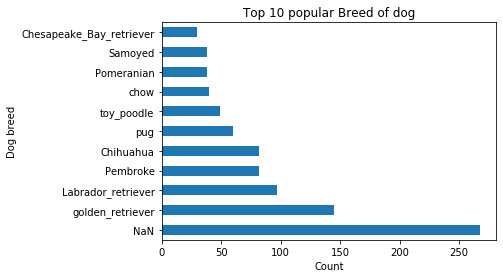

In [77]:
popular_dogs.plot(kind = 'barh');
plt.title('Top 10 popular Breed of dog')
plt.xlabel('Count')
plt.ylabel('Dog breed');

## 2. What is the 10 least popular dogs breed?

In [78]:
least_popular=all_data.image_predic.sort_values( ascending=True).value_counts().tail(15)
least_popular

Appenzeller                2
Sussex_spaniel             2
Australian_terrier         2
curly-coated_retriever     2
wire-haired_fox_terrier    2
Scotch_terrier             1
standard_schnauzer         1
clumber                    1
Bouvier_des_Flandres       1
Irish_wolfhound            1
Scottish_deerhound         1
groenendael                1
silky_terrier              1
black-and-tan_coonhound    1
Japanese_spaniel           1
Name: image_predic, dtype: int64

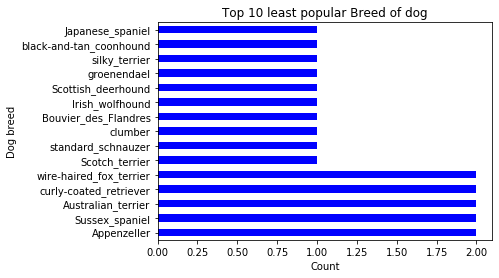

In [79]:
least_popular.plot(kind = 'barh', color='blue');
plt.title('Top 10 least popular Breed of dog')
plt.xlabel('Count')
plt.ylabel('Dog breed');

## 3. What are the favorite  dogs? it means which has the most like.

In this case, favorite refers to which dogs got the most like.

In [80]:
favorite_dogs= all_data[['favorites','image_predic']]
favorite_dogs_popular=favorite_dogs.sort_values(by=['favorites'],ascending=False).head(10)
favorite_dogs_popular

,favorites,image_predic
1015,150216.0,Chihuahua
517,116035.0,Maltese_dog
129,112583.0,golden_retriever
1055,111128.0,collie
65,96027.0,toy_poodle
433,85381.0,NaN
162,83511.0,cocker_spaniel
111,76357.0,Norwegian_elkhound
1741,76261.0,cocker_spaniel
520,73311.0,chow


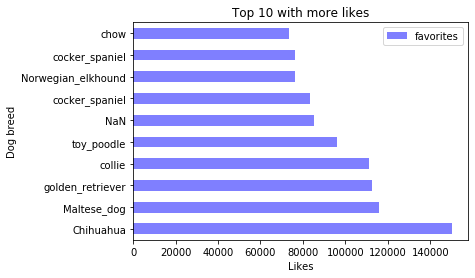

In [81]:

favorite_dogs_popular.plot(kind='barh',x='image_predic',y='favorites', alpha = 0.5, color='Blue');
plt.title('Top 10 with more likes')
plt.xlabel('Likes')
plt.ylabel('Dog breed');

We can observe that effectively chihuahua dog obtained the most likes.

In [82]:
favorite_dogs.favorites.max()


150216.0

In [83]:
favorite_dogs.favorites.min()

0.0

Also, there are certain dog breeds that do not receive a like which means it least favorite.

In [84]:
least_likes=favorite_dogs.sort_values(by=['favorites'],ascending=True).head(10)
least_likes

,favorites,image_predic
571,0.0,Bedlington_terrier
643,0.0,Norfolk_terrier
164,0.0,basset
638,0.0,Saint_Bernard
637,0.0,Tibetan_terrier
636,0.0,NaN
173,0.0,Chihuahua
616,0.0,Brittany_spaniel
177,0.0,NaN
646,0.0,Pomeranian


## 4.What does dog obtain more retweets?

In [85]:
retweets_dogs= all_data[['retweets','image_predic']]
retweets_dogs_most=retweets_dogs.sort_values(by=['retweets'],ascending=False).head(10)
retweets_dogs_most

,retweets,image_predic
1015,74122.0,Chihuahua
1055,55232.0,collie
517,54039.0,Maltese_dog
65,38988.0,toy_poodle
430,36007.0,pug
433,36007.0,NaN
520,33815.0,chow
129,31551.0,golden_retriever
1741,29962.0,cocker_spaniel
1805,28995.0,Pembroke


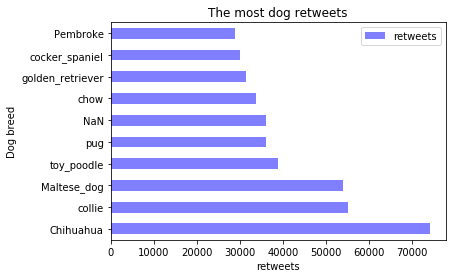

In [86]:
retweets_dogs_most.plot(kind='barh',x='image_predic',y='retweets', alpha = 0.5, color='blue');
plt.title('The most dog retweets')
plt.xlabel('retweets')
plt.ylabel('Dog breed');

## 4.What does dog obtain least retweets?

In [87]:
retweets_dogs= all_data[['retweets','image_predic']]
least_retweets_dogs=retweets_dogs.sort_values(by=['retweets'],ascending=True).head(10)
least_retweets_dogs

,retweets,image_predic
279,1.0,basenji
328,2.0,pug
262,2.0,beagle
1271,2.0,Old_English_sheepdog
29,3.0,NaN
1056,6.0,Norfolk_terrier
54,8.0,golden_retriever
63,10.0,miniature_pinscher
178,15.0,golden_retriever
1499,16.0,Lakeland_terrier


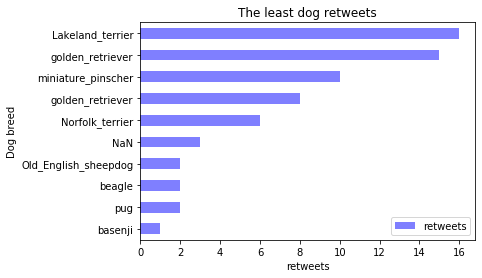

In [88]:
least_retweets_dogs.plot(kind='barh',x='image_predic',y='retweets', alpha = 0.5, color='blue');
plt.title('The least dog retweets')
plt.xlabel('retweets')
plt.ylabel('Dog breed');

## 5. Now, I will plot favorites (likes) and retweets. 

In orden to verify, the favorites and retweets must be increase as we can prove with the last graphs.

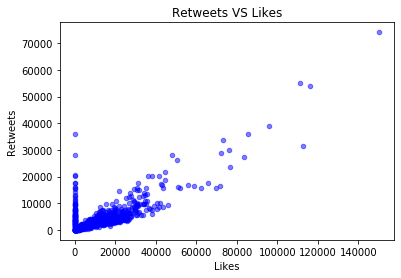

In [89]:

all_data.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5, color='b');
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets VS Likes');


As we saw the last 2 graphs (The most dog retweets and the top 10 with more likes), the number of likes and retweets are bigger with some breeds. So, this last graph confirmed a positively correlated with Likes and retweets. Also, exist somre breeds that are not favorite as consequence it has least retweets. 


# Conclusion

During whole analysis and visualization. I plot the most and least popular dog breeds. In addition, which dog breeds have more 'likes' and retweets. This allowed to verify which retweets vs likes are growing according with the favorites and popular breeds. Also, the least popular favorites make sense with the last graph where there are some point with 0 in like but some of them were retweets.  